In [1]:
%load_ext cypher
%matplotlib inline
import pandas as pd

/home/davebshow/.virtualenvs/scientific3/lib/python3.4/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/home/davebshow/.virtualenvs/scientific3/lib/python3.4/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


### Number of Tweets

In [3]:
%cypher match (n:tweet) return count(n)

1 rows affected.


count(n)
4306752


### Number of users

In [4]:
%cypher match (u:user) return count(u)

1 rows affected.


count(u)
2531874


### Top Tweets

In [5]:
%%cypher
match (n:tweet)-[r]-()
with n, count(r) as deg
order by deg desc
limit 10
match (n)<-[:TWEETS]-(u:user)
return u.screen_name as user, n.tid as tid, substring(n.text, 0, 20) as tweet, deg

10 rows affected.


user,tid,tweet,deg
Louis_Tomlinson,665496205854687232,Thoughts go out to e,38200
NiallOfficial,665322019291013120,thoughts and prayers,27828
Harry_Styles,665284325542371329,Thinking of everyone,22159
justinbieber,665334709996523520,Had a great first sh,17658
Michael5SOS,665336782418919425,all of my love and p,16861
RFCdan,665302723592519680,To people blaming re,14071
jean_jullien,665305363500011521,Peace for Paris http,13472
KingSalman,665642882125209601,Paris massacre is an,12739
Calum5SOS,665313435383672832,"Please, pray for Par",12263
taylorswift13,665442458872979460,Praying for Paris. O,11637


### Top Users

In [4]:
%%cypher
match (n:user)-[r]-()
return n.screen_name as user, n.uid, count(r) as deg
order by deg desc
limit 10

10 rows affected.


user,n.uid,deg
Louis_Tomlinson,84279963,38335
NiallOfficial,105119490,28089
RecherchesP,4185722537,23333
Harry_Styles,181561712,22686
infos140,1356382759,21227
justinbieber,27260086,21020
nytimes,807095,18266
AP,51241574,17747
jean_jullien,1851229334,17530
Michael5SOS,403246803,16901


### Top Tags

In [32]:
%%cypher
match (n:hashtag)-[r]-()
return n.hashtag as hashtags, count(r) as deg
order by deg desc
limit 10

10 rows affected.


hashtags,deg
paris,719571
prayforparis,368931
parisattacks,206159
prayers4paris,52805
bataclan,51524
rechercheparis,46333
prayersforparis,31736
france,31605
porteouverte,30484
fusillade,27833


### Language data

In [6]:
langs = %cypher match (n:tweet) where n.lang is not null return distinct n.lang, count(*) as num_tweets order by num_tweets desc

59 rows affected.


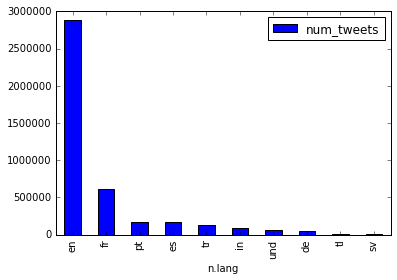

In [21]:
lang_df = langs.get_dataframe()
lang_df.set_index("n.lang")[:10].plot(kind="bar")

### % of tweets with geotags

In [41]:
%cypher match (n:tweet) return count(n)

1 rows affected.


count(n)
4306752


In [42]:
%cypher match (n:tweet) where n.coordinates is not null return count(n)

1 rows affected.


count(n)
55881


In [44]:
55881 / 4306752.0  # 1.2%

0.012975207302394008

### Tweets by country

In [37]:
countries = %cypher match (n:tweet) where n.coordinates is not null return distinct n.country, count(*) as num_tweets order by num_tweets desc

193 rows affected.


In [48]:
countries_df = countries.get_dataframe()

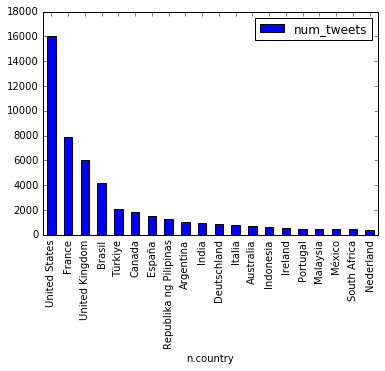

In [51]:
countries_df.set_index("n.country")[:20].plot(kind="bar")

### Average sentiment in English

In [56]:
%cypher match (n:tweet) where n.lang = "en" return avg(n.polarity) as average_en_polarity

1 rows affected.


average_en_polarity
0.013533890799815687


In [57]:
%cypher match (n:tweet) where n.lang = "en" return avg(n.subjectivity) as average_en_subjectivity

1 rows affected.


average_en_subjectivity
0.2964692099365155


### Average sentiment in French

In [58]:
%cypher match (n:tweet) where n.lang = "fr" return avg(n.polarity) as average_fr_polarity

1 rows affected.


average_fr_polarity
0.033514273832053354


In [59]:
%cypher match (n:tweet) where n.lang = "fr" return avg(n.subjectivity) as average_fr_subjectivity

1 rows affected.


average_fr_subjectivity
0.3372897579084551
